In [35]:
from IPython.display import HTML, display
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
# print_function for compatibility with Python 3
#from __future__ import print_function
# import packages for analysis and modeling
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt #2D plotting
# Matplotlib for visualization
%matplotlib inline 
# Seaborn for easier visualization
import seaborn as sns
sns.set_style("darkgrid")
#df = pd.read_csv('coaches_inputed.csv')
#df = df.fillna('')
#df = df.fillna(0)
#df.dropna(how='any')
#df.apply(pd.to_numeric, errors='ignore')
#df.fillna()
#df.dropna(inplace=True)
#df.head()

df = pd.read_csv('coaches_inputed.csv')

print(pd.DataFrame.head(Coaches))

df.describe()

                  School      Conf              Coach  NCAAFBREV16  \
0              Air Force  Mt. West       Troy Calhoun   59577780.0   
1                  Akron       MAC       Terry Bowden   35331217.0   
2                Alabama       SEC         Nick Saban  174307419.0   
3  Alabama at Birmingham     C-USA         Bill Clark   24795218.0   
4      Appalachian State  Sun Belt  Scott Satterfield   35058621.0   

   MedianConfSal  SchoolPay  TotalPay    Bonus  BonusPaid  PayPlusBonus2016  \
0       879288.0     885000    885000   247000      85625            885000   
1       492413.0     411000    412500   225000      50000            462500   
2      3929800.0    8307000   8307000  1100000     500000           8807000   
3       782787.0     900000    900000   950000     165471           1065471   
4       675000.0     712500    712500   295000     145000            857500   

   AssistantPay      Buyout  StadSize  Attendence2016  AttendRank  \
0           NaN         NaN     466

,NCAAFBREV16,MedianConfSal,SchoolPay,TotalPay,Bonus,BonusPaid,PayPlusBonus2016,AssistantPay,Buyout,StadSize,Attendence2016,AttendRank,AvgAttend,Avg AttendenceRank,GSR,PayRank,SeatRank,GSRank,ComboRank,TrueRank,W,L,Ratio,OffenceScore,DefenseScore,Score,PointsPerGame,OpponentPointsPerGame
count,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,0.0,1.060000e+02,130.000000,130.000000,105.000000,104.000000,104.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,7.535657e+07,2.161691e+06,2.372510e+06,2.380626e+06,8.566313e+05,1.407357e+05,2.502236e+06,NaN,8.195703e+06,51761.615385,285210.107692,53.000000,44806.817308,52.500000,74.307692,61.476923,65.246154,63.638462,63.453846,65.269231,6.784615,6.007692,1.760159,0.614692,0.399231,1.207692,76.135462,-18.351769
std,4.437656e+07,1.326917e+06,1.844069e+06,1.848026e+06,5.765934e+05,1.927358e+05,1.940801e+06,NaN,1.048086e+07,23506.430870,173792.342704,30.454885,26667.078331,30.166206,13.800262,37.584265,37.800181,37.753588,28.094341,37.687781,2.850227,2.290852,2.207275,5.707697,6.037421,8.755547,7.160710,7.235124
min,1.613242e+07,4.924130e+05,3.900000e+05,3.900000e+05,5.000000e+04,1.000000e+04,3.900000e+05,NaN,0.000000e+00,9214.000000,38946.000000,1.000000,7789.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.666667,1.000000,1.000000,1.000000,0.090900,-13.010000,-11.120000,-18.860000,60.550000,-38.830000
25%,3.715826e+07,7.827870e+05,8.131725e+05,8.134350e+05,4.387500e+05,7.500000e+04,8.518750e+05,NaN,1.208333e+06,30973.000000,163849.750000,27.000000,22658.500000,26.750000,69.250000,29.250000,33.250000,33.250000,40.833333,32.000000,4.000000,4.000000,0.500000,-3.265000,-3.410000,-4.600000,70.745000,-23.055000
50%,6.237636e+07,2.458032e+06,1.830790e+06,1.865794e+06,7.750000e+05,8.562500e+04,2.000000e+06,NaN,4.018758e+06,50000.000000,243586.000000,53.000000,38287.500000,52.500000,74.000000,61.500000,64.000000,60.000000,65.000000,65.000000,7.000000,6.000000,1.166667,0.000000,0.000000,1.680000,75.160000,-18.200000
75%,9.950873e+07,3.775000e+06,3.537500e+06,3.537500e+06,1.018750e+06,9.875000e+04,3.623694e+06,NaN,1.142250e+07,66147.250000,336642.250000,79.000000,57749.750000,78.250000,83.000000,93.750000,97.750000,97.000000,83.666667,97.750000,9.000000,8.000000,2.250000,4.047500,4.030000,7.400000,80.640000,-14.235000
max,2.148306e+08,3.929800e+06,8.307000e+06,8.307000e+06,3.100000e+06,1.350000e+06,8.807000e+06,NaN,6.812500e+07,107601.000000,883741.000000,105.000000,110468.000000,104.000000,100.000000,126.000000,130.000000,130.000000,126.333333,129.000000,14.000000,11.000000,14.000000,14.640000,17.620000,25.620000,92.540000,-0.990000


In [36]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
coaching_model = ols("PayPlusBonus2016 ~ NCAAFBREV16", data=df).fit()

# summarize our model
coaching_model_summary = coaching_model.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(coaching_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

* Adj. R-Squared 0.754 indicates 75.3% of the Coaches Salary can be explained by the predictor variable : NCAA Football Revenue Previous Year *

* Regression coefficient (coef) represents the change in the dependent variable resulting from one unit of change in the predictor variable, all other variables being held constant. In this model a one unit increase in NCAA football team previous year revenue leads to a 3.55% increase in salary.

* standard error measures the accuracy of the NCAA Salary coefficient by estimating the variation of the coefficient if the same test were run on a different sample of our population.
Our Standard error, 0.002 is low therefore it appears accurate.

* confidence interval is a range within wich our coefficient is likely to fall. we can be 95% confident that the NCAA salary coefficient will be
withing our confidence interval, [0.034, 0.042]

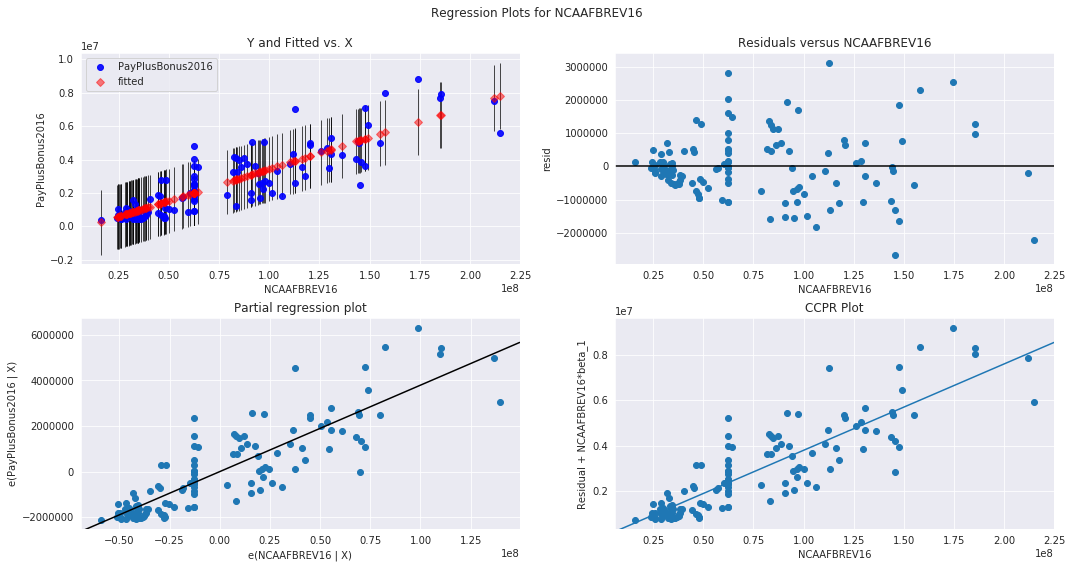

In [37]:
## This produces our four regression plots for total_umployed
fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(coaching_model, "NCAAFBREV16", fig=fig)

* "Y and Fitted vs. X" graph plots dependent variable aganst predicted values with a confidence interval
* Residuals vs NCAA" shows our models errors versies the specific predictor variable
* Partial regression plto shows relationship between Revenue and Salary
* CCPR shows where the trendline would lie after adding the impact of adding other indpendent variables on our coefficent

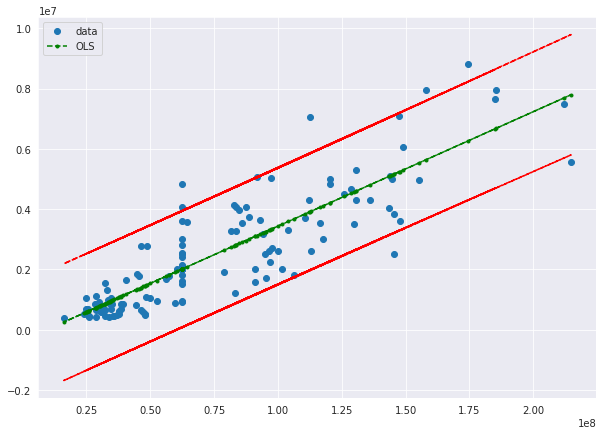

In [38]:
# predictor variable (x) and dependent variable (y)
x = df[['NCAAFBREV16']]
y = df[['PayPlusBonus2016']]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(coaching_model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, coaching_model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

# Multi linear Regression #

In [39]:
# list input variales for model
list(df.columns.values)

['School',
 'Conf',
 'Coach',
 'NCAAFBREV16',
 'MedianConfSal',
 'SchoolPay',
 'TotalPay',
 'Bonus',
 'BonusPaid',
 'PayPlusBonus2016',
 'AssistantPay',
 'Buyout',
 'StadSize',
 'Attendence2016',
 'AttendRank',
 'AvgAttend',
 'Avg AttendenceRank',
 'GSR',
 'PayRank',
 'SeatRank',
 'GSRank',
 'ComboRank',
 'TrueRank',
 'W',
 'L',
 'Ratio',
 'OffenceScore',
 'DefenseScore',
 'Score',
 'PointsPerGame',
 'OpponentPointsPerGame']

In [47]:
# again, invoke statsmodel's formula API using the below syntax
coaching_model = ols("""PayPlusBonus2016 ~ NCAAFBREV16 
                                        + MedianConfSal
                                        + StadSize
                                        + Attendence2016
                                        + AvgAttend
                                        + GSR 
                                        + W
                                        + L
                                        + OffenceScore
                                        + DefenseScore
                                        + Score
                                        + PointsPerGame
                                        + OpponentPointsPerGame""", data=df).fit()
# summarize our model
coaching_model_summary = coaching_model.summary()
HTML(coaching_model_summary.as_html())

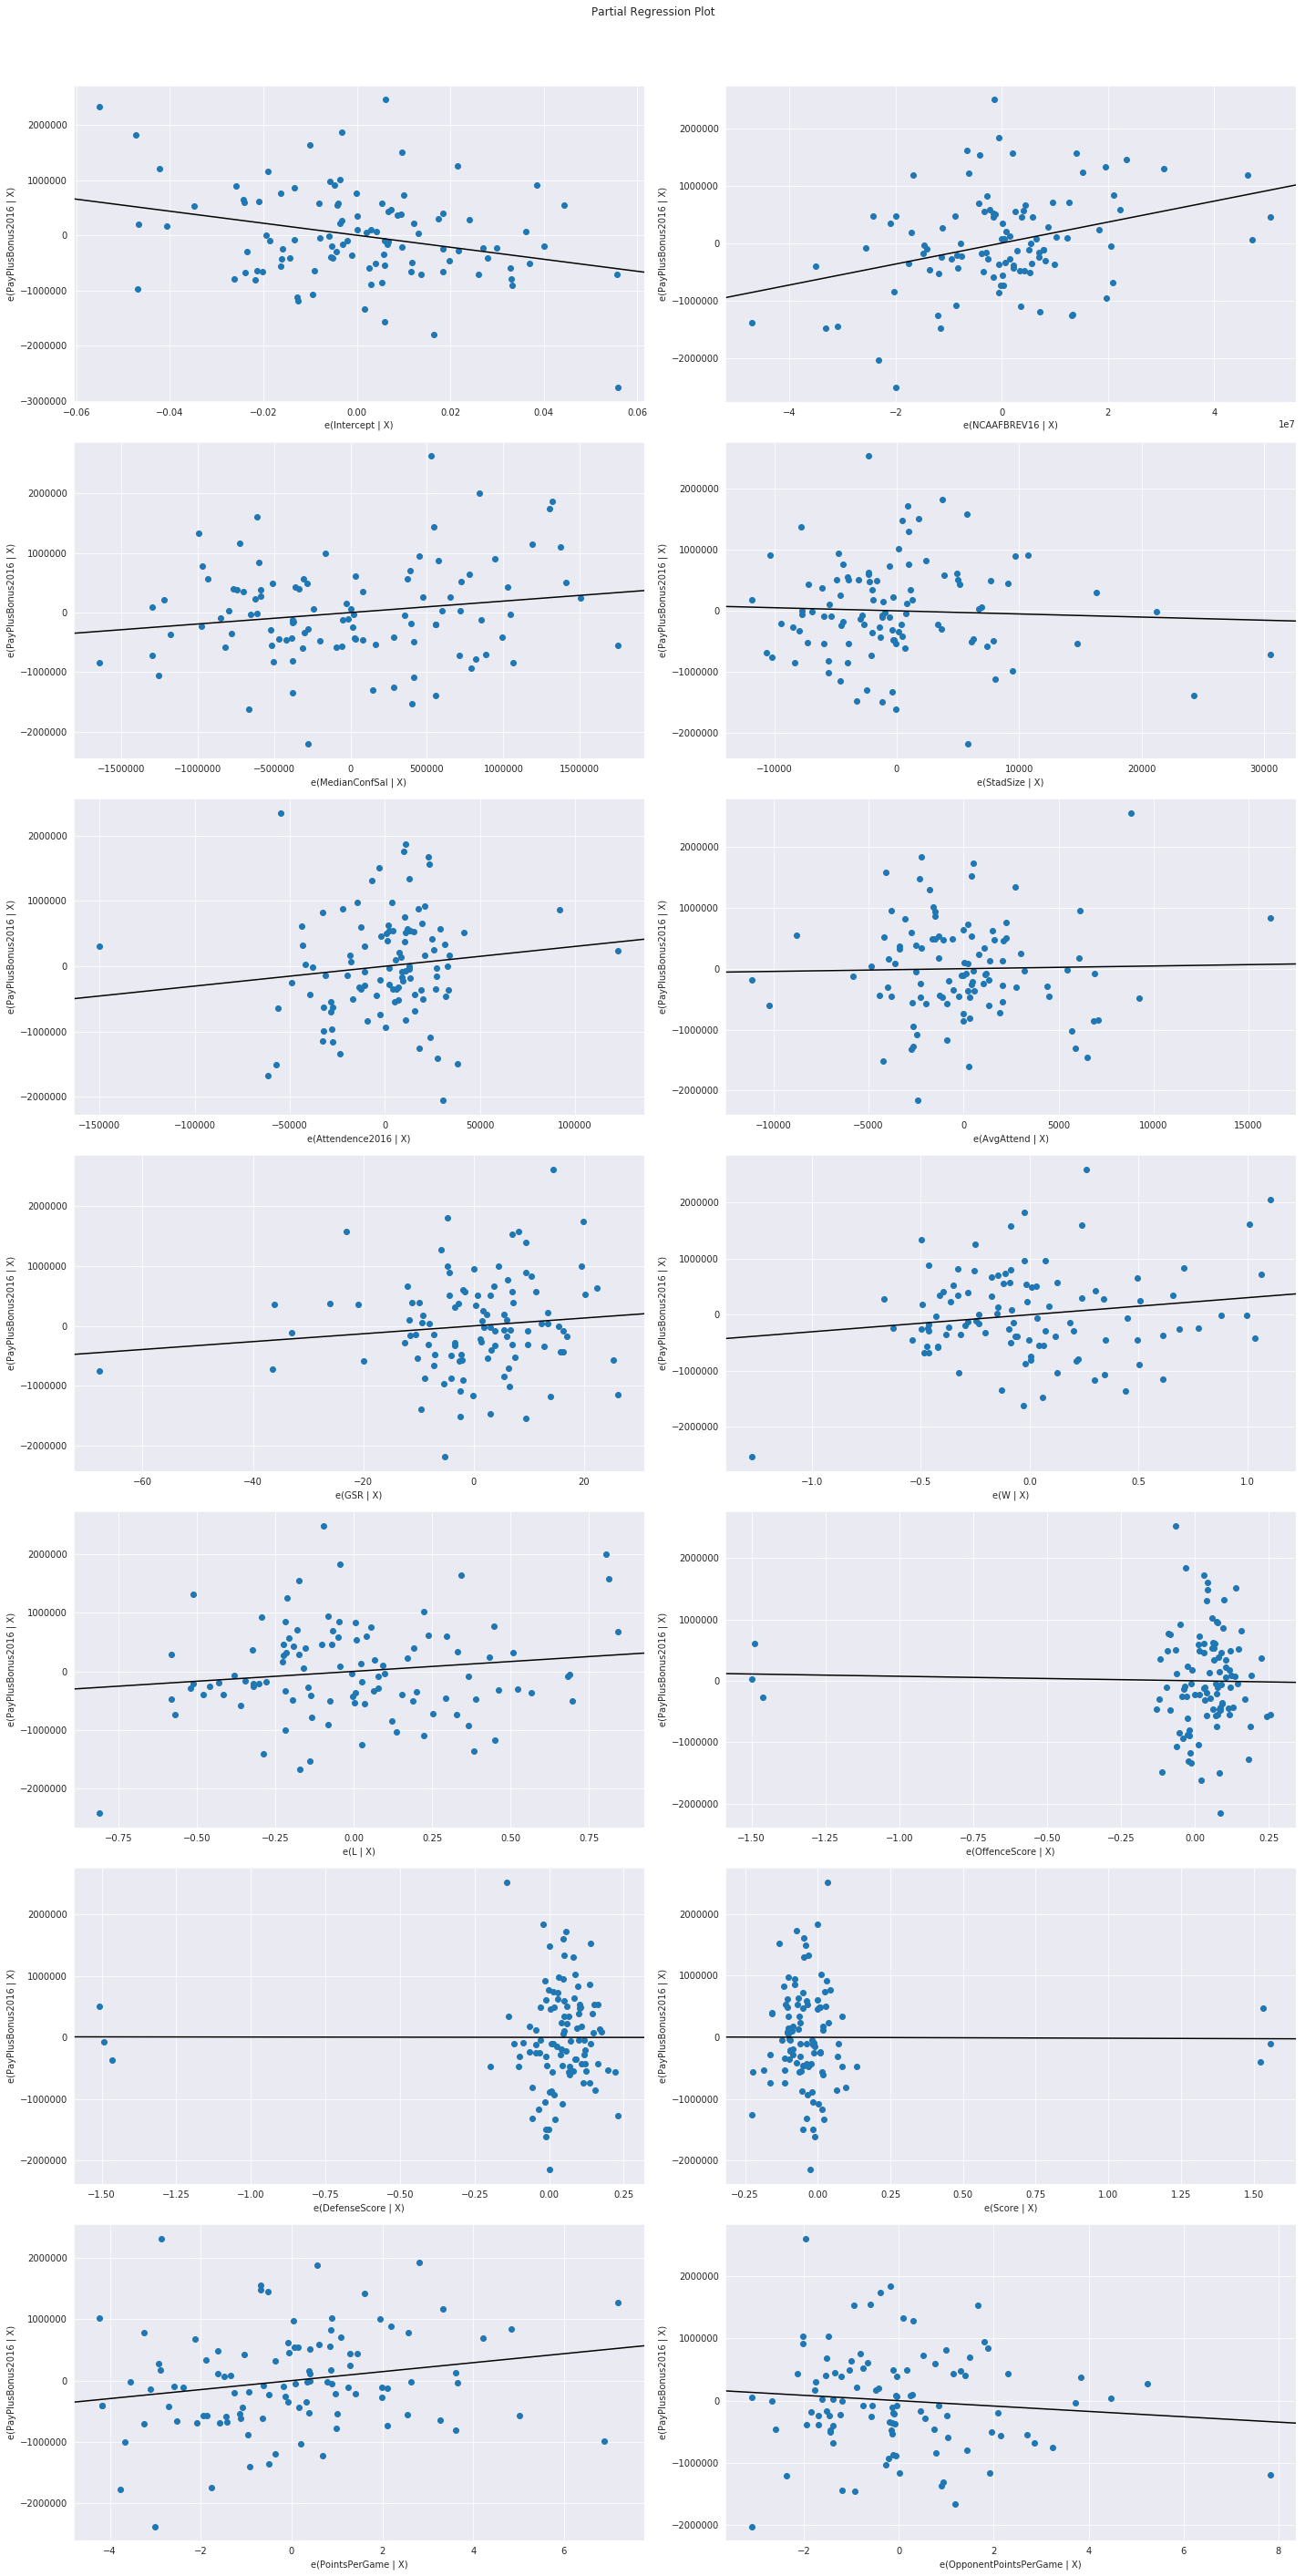

In [48]:
fig = plt.figure(figsize=(20,40))
fig = sm.graphics.plot_partregress_grid(coaching_model, fig=fig)

* R-Squared Indicates that 84.1% of Coaches Salary can be explained by our predictor variables
* Regression Coeffiecents : Surprisingly the Stadium size and offensive defensive scores had a negative effect on coaches salary
    while graduation rate, previous years attendence and avg attendence had large effects on salary.
* Standard errors were pretty high on most variables except team revenue, median conf salary, so this implys these imput variables 
should be taked with low confidence to pre higly explantory of coach salary
* P value were generally low but not uniformly low,team revenue being highest confidence lowest value
* also since the intercept ( base salary ) was actually negative I think there might be some biases or issues with this data in general


# Big Ten Model 

In [51]:
df2 = pd.read_csv('coaches_inputed_big10.csv')
df2.head()

,School,Conf,Coach,NCAAFBREV16,MedianConfSal,SchoolPay,TotalPay,Bonus,BonusPaid,PayPlusBonus2016,AssistantPay,Buyout,StadSize,Attendence2016,AttendRank,AvgAttend,Avg AttendenceRank,GSR,PayRank,SeatRank,GSRank,ComboRank,TrueRank,W,L,Ratio,OffenceScore,DefenseScore,Score,PointsPerGame,OpponentPointsPerGame
0,Illinois,Big Ten,Lovie Smith,97447731.0,3775000,5000000,5000000,1000000,50000,5050000,NaN,12636991.0,60670,319505,38,45644,44,72,114,85,52,83.666667,32,3,9,0.333333,-5.92,-1.83,-7.75,69.69,-15.34
1,Indiana,Big Ten,Tom Allen,106139192.0,3775000,1830000,1830000,1441668,85625,1830000,NaN,2000000.0,52959,301190,43,43027,49,74,60,76,60,65.333333,64,6,7,0.857143,2.15,-0.77,1.38,74.18,-18.48
2,Iowa,Big Ten,Kirk Ferentz,130681467.0,3775000,4700000,4700000,2875000,600000,5300000,NaN,22396250.0,70585,487591,17,69656,20,84,117,105,101,107.666667,9,8,5,1.600000,-0.51,7.31,6.81,74.25,-26.71
3,Maryland,Big Ten,DJ Durkin,94881357.0,3775000,2512000,2512000,625000,85625,2512000,NaN,5096178.0,51802,237690,56,39615,51,73,72,72,55,66.333333,59,6,7,0.857143,-1.82,1.89,0.07,74.00,-16.62
4,Michigan,Big Ten,Jim Harbaugh,185173187.0,3775000,7504000,7504000,1325000,150000,7654000,NaN,17111110.0,107601,883741,1,110468,1,85,123,130,107,120.000000,3,10,3,3.333333,4.71,12.85,17.56,90.05,-32.85


In [53]:

# Big Ten Model
Big10_model = ols("""PayPlusBonus2016 ~ NCAAFBREV16 
                                        + MedianConfSal
                                        + StadSize
                                        + Attendence2016
                                        + AvgAttend
                                        + GSR 
                                        + W
                                        + L
                                        + OffenceScore
                                        + DefenseScore
                                        + Score
                                        + PointsPerGame
                                        + OpponentPointsPerGame""", data=df2).fit()
# summarize our model
Big10_model_summary = Big10_model.summary()
HTML(Big10_model_summary.as_html())

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


# Big 12 Model

In [55]:
df3 = pd.read_csv('coaches_inputed_big12.csv')
# Big Ten Model
Big12_model = ols("""PayPlusBonus2016 ~ NCAAFBREV16 
                                        + MedianConfSal
                                        + StadSize
                                        + Attendence2016
                                        + AvgAttend
                                        + GSR 
                                        + W
                                        + L
                                        + OffenceScore
                                        + DefenseScore
                                        + Score
                                        + PointsPerGame
                                        + OpponentPointsPerGame""", data=df3).fit()
# summarize our model
Big12_model_summary = Big12_model.summary()
HTML(Big12_model_summary.as_html())

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))
/opt/conda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1549: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/conda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1550: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/opt/conda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1558: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/opt/conda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
